# Junction Parameters 

$$E_J = \frac{\hbar}{2e}{I_c} \propto \frac{\hbar}{2e}{I_{c, \text{per unit area}}}A $$
where critical current goes linearly with area and inversely prp to oxide thickness

$$I_C = \frac{\pi \Delta(0)}{2eR_n}$$
where \(\Delta(0) = 170 \mu\text{eV}\) for Aluminum 

$$\omega = \sqrt{8E_CE_J} - E_C$$ 
for transmon


# Utilities

In [130]:
import numpy as np 
q_e = 1.602176634e-19  # Charge of an electron in Coulombs
Delta_0 = 170e-6 * q_e  # 170 μeV in Joules
hbar = 1.054571817e-34  # Reduced Planck's constant in J·s
h = 6.62607015e-34  # Planck's constant in J·s


# Ej from area, Jc 
def E_J_from_area_jc(area, J_c):
    """
    Convert junction area (in um^2) and critical current density (in nA/um^2) to Josephson energy (GHz).
    Uses:
        I_C = J_C * Area
        E_J = (ħ / 2e) * I_C
    Returns: list of E_J in GHz
    """
    Jc_A_um2 = J_c * 1e-9  # convert nA/um^2 to A/um^2
    I_c = Jc_A_um2 * area  # A
    E_J = (hbar / (2 * q_e)) * I_c  # Joules
    E_J_GHz = E_J / h / 1e9  # Convert J to GHz
    return E_J_GHz

#  Resistances from Ej 
def resistance_to_E_J(resistance):
    """
    Convert a list of normal resistances (in kOhm) to Josephson energy (GHz).
    Uses:
        I_C = (π Δ(0)) / (2e R_n)
        E_J = (ħ / 2e) * I_C
    Returns: list of E_J in GHz
    """
    Delta_0 = 170e-6 * q_e  # 170 μeV in Joules
    R_n = resistance * 1e3  # convert kOhm to Ohm
    I_c = (np.pi * Delta_0) / (2 * q_e * R_n)  # A
    E_J = (hbar / (2 * q_e)) * I_c  # Joules
    E_J_GHz = E_J / h / 1e9  # Convert J to GHz
    return E_J_GHz

# Critical current from Ej

def critical_current_density_from_E_J(E_J_GHz, junc_area):
    """
    Convert Josephson energy (in GHz) to critical current density (in nA/um^2).
    Uses:
        J_C = (ħ / 2e) * E_J/Area
    Returns: list of J_C in nA/um^2
    """
    E_J = E_J_GHz * h * 1e9  # Convert GHz to Joules
    J_c = ((2 * q_e) / hbar ) * E_J/junc_area  # A
    J_c_nA = J_c * 1e9  # Convert A to nA
    return J_c_nA

# Junctions -------------------------
def compute_junction_length(bridge_width, undercut_height = 0.610, angle_deg= 15.7, first_layer_height= 0.045):
    """
    Compute the junction length given bridge width, undercut height, and angle.
    Returns the junction length in um.

    angle_deg: specified in plassys in deg
    """
    # dep_width_beam_1 = -1*(undercut_height * np.tan(np.radians(angle_deg))) + bridge_width
    # dep_width_beam_2 = (undercut_height - first_layer_height) * np.tan(np.radians(angle_deg))
    # print(f"Dep width beam 1: {dep_width_beam_1:.2f} um")
    # print(f"Dep width beam 2: {dep_width_beam_2:.2f} um")
    # return dep_width_beam_2 - dep_width_beam_1
    return 0.250

def compute_junction_length_from_sem_area(bridge_width):
    """
    Compute the junction length given bridge width, undercut height, and angle.
    Returns the junction length in um.

    angle_deg: specified in plassys in deg
    """
    if bridge_width == 0.2:
        return (0.354 + 0.376) / 2
    elif bridge_width == 0.15:
        return 0.383

def find_junction_area(bridge_width, pin_width, undercut_height = 0.610, angle_deg= 15.7, first_layer_height= 0.045, 
                       use_sem_length=False):
    """
    Compute the area of the junction given bridge width, pin width, undercut height, and angle.
    Returns the area in um^2.
    """
    if use_sem_length:
        junction_length = compute_junction_length_from_sem_area(bridge_width)
    else:
        junction_length = compute_junction_length(bridge_width, undercut_height, angle_deg, first_layer_height)
    area = pin_width * junction_length
    return area

In [131]:
compute_junction_length(0.15)

0.25

### Probe Station Data

In [172]:
# Probe station measurements 
import pandas as pd
# chip, chip _subname, resistance in kOhm

data = [
    # Q groups
    ["Q1", "Q", 2.3373],
    ["Q1", "T1", 2.637],
    ["Q1", "T2", 2.902],
    # ["Q1", "T2", 1.2854],   # from Ω → kΩ
    ["Q1", "T3", 2.987],

    ["Q2", "Q", 2.105],
    ["Q2", "T1", 2.408],
    # ["Q2", "T1", 1.2009],
    ["Q2", "T2", 2.579],
    ["Q2", "T3", 2.357],
    # ["Q2", "T3", 1.2993],

    ["Q4", "Q", 1.912],
    ["Q4", "T1", 1.999],
    ["Q4", "T2", 2.167],
    ["Q4", "T3", 1.976],

    ["Q5", "T1", 1.4827],
    ["Q5", "T3", 1.5006],

    ["Q8", "T2", 1.1893],

    ["Q10", "T1", 1.4809],
    ["Q10", "T3", 1.4453],

    ["Q13", "T1", 1.5549],
    ["Q13", "T2", 1.6879],

    ["Q14", "T2", 1.4408],

    ["Q15", "T2", 1.7054],

    ["Q16", "T3", 1.3475],

    # CF and CG
    ["CF", "C", 0.756],
    ["CF", "T1", 0.853],
    ["CF", "T2", 0.662],
    ["CF", "T3", 0.83055],
    ["CF", "T4", 0.632],

    ["CG", "C", 0.386],
    ["CG", "T1", 0.410],
    ["CG", "T2", 0.363],
    ["CG", "T3", 0.377],
    ["CG", "T4", 0.430],

    # C-blocks
    ["CA", "T1", 0.50025],
    ["CA", "T2", 0.40432],
    ["CA", "T3", 0.51198],
    ["CA", "T4", 0.40896],

    ["CB", "T1", 0.49627],
    ["CB", "T2", 0.45449],

    ["CC", "T1", 0.53618],
    ["CC", "T3", 0.51784],

    ["CD", "T1", 0.56643],
    ["CD", "T2", 0.56375],

    ["CE", "T1", 0.66679],
    ["CE", "T4", 0.65795],
]

df = pd.DataFrame(data, columns=["Chip", "Substructure", "Resistance (kΩ)"])



# coupler_df  starts with C
coupler_df = df[df["Chip"].str.startswith("C")].reset_index(drop=True)
# qubit_df starts with Q
qubit_df = df[df["Chip"].str.startswith("Q")].reset_index(drop=True)

coupler_chip_names = coupler_df["Chip"] + "-" + coupler_df["Substructure"]
coupler_resistances = coupler_df["Resistance (kΩ)"].tolist()
qubit_chip_names = qubit_df["Chip"] + "-" + qubit_df["Substructure"]
qubit_resistances = qubit_df["Resistance (kΩ)"].tolist()



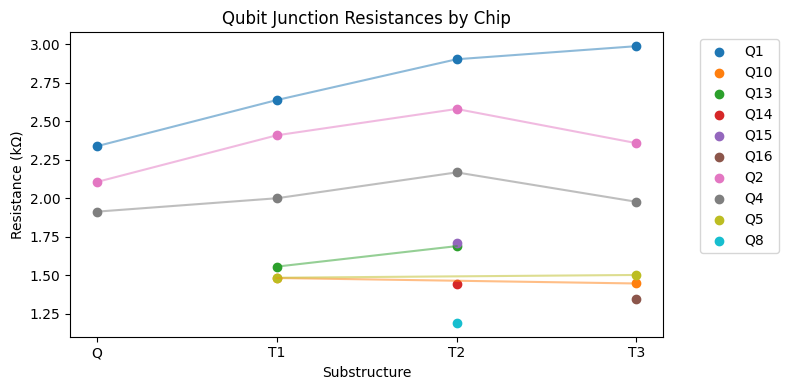

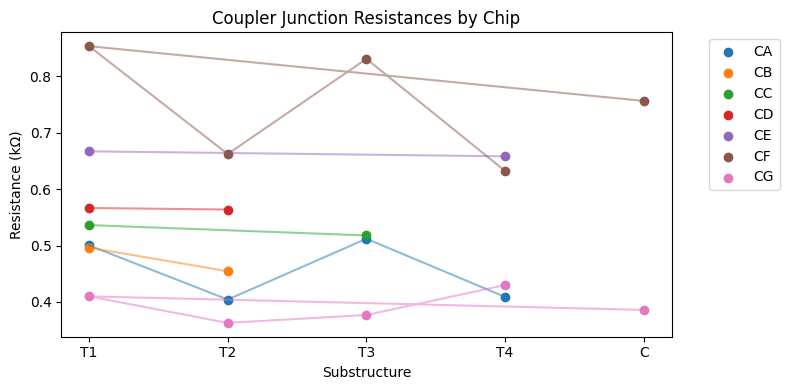

In [173]:
# plot scatter resistances. for chip with same name , plot line between them
import matplotlib.pyplot as plt

# Scatter plot for Qubit chips
plt.figure(figsize=(8, 4))
for chip, group in qubit_df.groupby("Chip"):
    plt.scatter(group["Substructure"], group["Resistance (kΩ)"], label=chip)
    plt.plot(group["Substructure"], group["Resistance (kΩ)"], linestyle='-', alpha=0.5)
plt.xlabel("Substructure")
plt.ylabel("Resistance (kΩ)")
plt.title("Qubit Junction Resistances by Chip")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Scatter plot for Coupler chips
plt.figure(figsize=(8, 4))
for chip, group in coupler_df.groupby("Chip"):
    plt.scatter(group["Substructure"], group["Resistance (kΩ)"], label=chip)
    plt.plot(group["Substructure"], group["Resistance (kΩ)"], linestyle='-', alpha=0.5)
plt.xlabel("Substructure")
plt.ylabel("Resistance (kΩ)")
plt.title("Coupler Junction Resistances by Chip")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Resistances to Ej

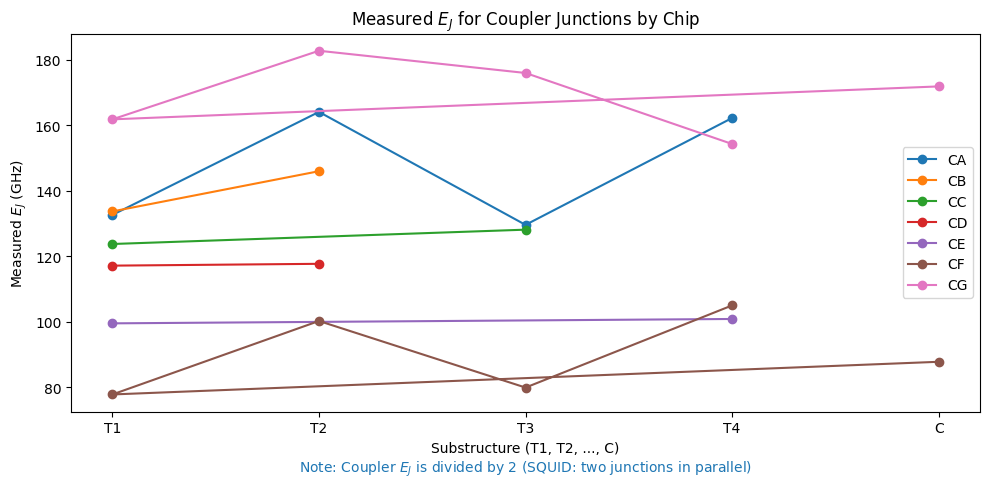

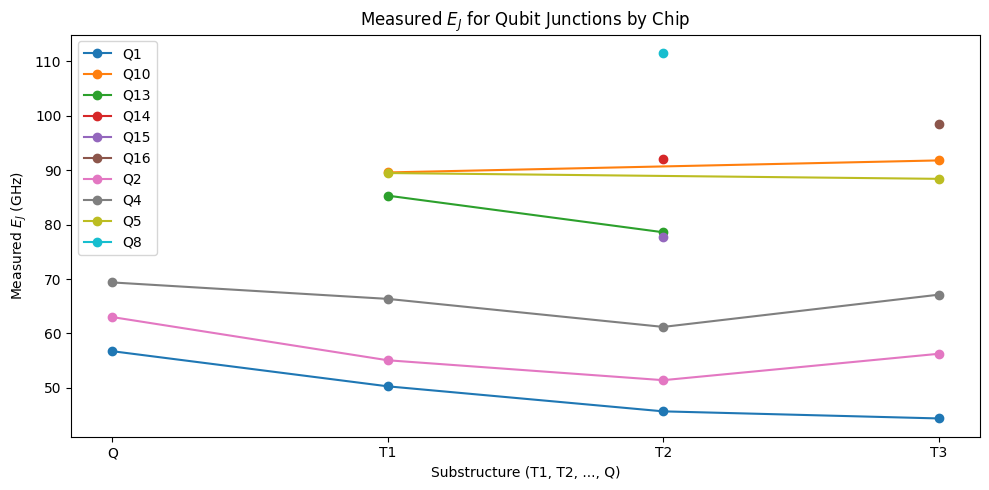

In [174]:
# conver reistances to Ejs using these formulas 

E_Js_coupler_measured = np.array(resistance_to_E_J(np.array(coupler_resistances)))/ 2 # since coupler is a squid with two junctions in parallel
E_Js_qubit_measured = resistance_to_E_J(np.array(qubit_resistances))

import matplotlib.pyplot as plt

# Plot measured E_J for coupler chips, grouped by chip name
plt.figure(figsize=(10, 5))
for chip, group in coupler_df.groupby("Chip"):
    x_labels = group["Substructure"].tolist()
    idx = group.index.tolist()
    plt.plot(x_labels, E_Js_coupler_measured[idx], marker='o', linestyle='-', label=chip)
plt.xlabel("Substructure (T1, T2, ..., C)")
plt.ylabel("Measured $E_J$ (GHz)")
plt.title("Measured $E_J$ for Coupler Junctions by Chip")
plt.annotate(
    "Note: Coupler $E_J$ is divided by 2 (SQUID: two junctions in parallel)",
    xy=(0.5, -0.15), xycoords='axes fraction',
    ha='center', va='center', fontsize=10, color='tab:blue'
)
plt.legend()
plt.tight_layout()
plt.show()


# Plot measured E_J for qubit chips, grouped by chip name
plt.figure(figsize=(10, 5))
for chip, group in qubit_df.groupby("Chip"):
    x_labels = group["Substructure"].tolist()
    idx = group.index.tolist()
    plt.plot(x_labels, E_Js_qubit_measured[idx], marker='o', linestyle='-', label=chip)
plt.xlabel("Substructure (T1, T2, ..., Q)")
plt.ylabel("Measured $E_J$ (GHz)")
plt.title("Measured $E_J$ for Qubit Junctions by Chip")
plt.legend()
plt.tight_layout()
plt.show()


In [175]:
# R_n = 3 * 1e3  # convert kOhm to Ohm
# Delta_0 = 170e-6 * e  # 170 μeV in Joules
# hbar = 1.054571817e-34  # J·s
# e = 1.602176634e-19  # C
# I_c = (np.pi * Delta_0) / (2 * e * R_n)  # A
# E_J = (hbar / (2 * e)) * I_c  # Joules
# E_J_GHz = E_J / (6.62607015e-34) / 1e9 
# print(f"Calculated E_J for R_n = {R_n/1e3} kΩ: {E_J_GHz:.2f} GHz")



# # now do a backwards conversion 

## Desired Parameters

### From Design File

In [176]:
# coupler chip configs 
coupler_chip_configs = [
        # (junc_correction, flip, CHIPNAME, type)
        ({'width': 1.2, 'gap': 0.2}, False, 'CA', 1),
        ({'width': 1.1, 'gap': 0.2}, False, 'CB', 1),
        ({'width': 1.0, 'gap': 0.2}, False, 'CC', 1),
        ({'width': 0.9, 'gap': 0.2}, False, 'CD', 1),
        ({'width': 0.8, 'gap': 0.2}, False, 'CE', 1),
        ({'width': 0.7, 'gap': 0.2}, False, 'CF', 1),
        ({'width': 1.3, 'gap': 0.2}, False, 'CG', 0),

    ]
# qubit chip configs 
import itertools

# Generate 25 unique (width, gap) pairs
widths = np.round(np.linspace(0.3, 0.9, 12), 2)
gaps = [0.2,0.15]
width_gap_pairs = list(itertools.product(widths, gaps))[:25]

qubit_chip_configs = [
    ({'width': float(w), 'gap': float(g)}, False, f'Q{i+1}')#, 1 if i % 2 == 0 else 0)
    for i, (w, g) in enumerate(width_gap_pairs)
]

qubit_chip_configs.append(({'width': 1.0, 'gap': 0.2}, False, 'Q25'))  # Add a custom chip config for Q11



# conver chip cofigs to design data 
coupler_design_data = {
    "Chip": [],
    "pin_widths_um": [],
    "gap_um": [],
}
qubit_design_data = {
    "Chip": [],
    "pin_widths_um": [],
    "gap_um": [],
}
for config in coupler_chip_configs:
    junc_correction, flip, chip_name, _ = config
    coupler_design_data["Chip"].append(chip_name)
    coupler_design_data["pin_widths_um"].append(junc_correction['width'])
    coupler_design_data["gap_um"].append(junc_correction['gap'])

for config in qubit_chip_configs:
    junc_correction, flip, chip_name = config
    qubit_design_data["Chip"].append(chip_name)
    qubit_design_data["pin_widths_um"].append(junc_correction['width'])
    qubit_design_data["gap_um"].append(junc_correction['gap'])


In [177]:

critical_current_per_area = 200 # n A /um^2


def compute_Ej_area_from_jparam_Jc(pin_width, gap, Jc, use_sem_length=True):
    ''' find Junction area and Ej from junction parameters and critical current density Jc'''
    area = find_junction_area(bridge_width=gap, pin_width=pin_width, use_sem_length=use_sem_length)
    # print(f"Computed junction area: {area:.3f} um^2 for pin width: {pin_width} um, gap: {gap} um")
    E_J = E_J_from_area_jc(area, Jc)
    return area, E_J

Pin width: 1.2 um, gap: 0.2 um, area: 0.438 um^2, E_J: 43.509 GHz
Pin width: 1.1 um, gap: 0.2 um, area: 0.402 um^2, E_J: 39.884 GHz
Pin width: 1.0 um, gap: 0.2 um, area: 0.365 um^2, E_J: 36.258 GHz
Pin width: 0.9 um, gap: 0.2 um, area: 0.329 um^2, E_J: 32.632 GHz
Pin width: 0.8 um, gap: 0.2 um, area: 0.292 um^2, E_J: 29.006 GHz
Pin width: 0.7 um, gap: 0.2 um, area: 0.256 um^2, E_J: 25.381 GHz
Pin width: 1.3 um, gap: 0.2 um, area: 0.474 um^2, E_J: 47.135 GHz


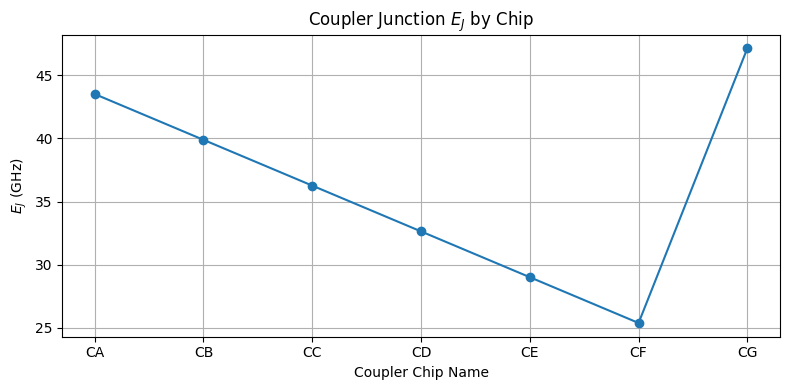

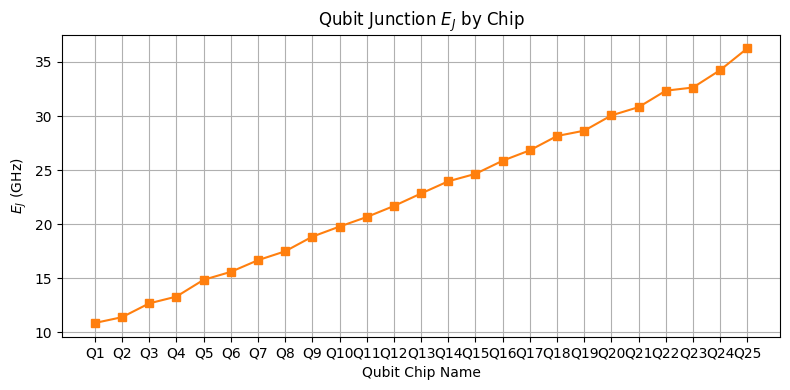

In [178]:
areas_coupler = []
E_Js_coupler = []
for pin_width, gap in zip(coupler_design_data["pin_widths_um"], coupler_design_data["gap_um"]):
    area, E_J = compute_Ej_area_from_jparam_Jc(pin_width, gap, critical_current_per_area)
    print(f"Pin width: {pin_width} um, gap: {gap} um, area: {area:.3f} um^2, E_J: {E_J:.3f} GHz")
    areas_coupler.append(area)
    E_Js_coupler.append(E_J)


# Qubit E_J calculation (assuming same bridge/junction width for all qubits as example)
# You can update these values if you have actual design data for qubits

areas_qubit = []
E_Js_qubit = []
for pin_width, gap in zip(qubit_design_data["pin_widths_um"], qubit_design_data["gap_um"]):
    area, E_J = compute_Ej_area_from_jparam_Jc(pin_width, gap, critical_current_per_area)
    areas_qubit.append(area)
    E_Js_qubit.append(E_J)

# Plot for Coupler
plt.figure(figsize=(8, 4))
plt.plot(coupler_design_data["Chip"], E_Js_coupler, marker='o', linestyle='-', color='tab:blue')
plt.xlabel("Coupler Chip Name")
plt.ylabel("$E_J$ (GHz)")
plt.title("Coupler Junction $E_J$ by Chip")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Qubit
plt.figure(figsize=(8, 4))
plt.plot(qubit_design_data["Chip"], E_Js_qubit, marker='s', linestyle='-', color='tab:orange')
plt.xlabel("Qubit Chip Name")
plt.ylabel("$E_J$ (GHz)")
plt.title("Qubit Junction $E_J$ by Chip")
plt.grid(True)
plt.tight_layout()
plt.show()



In [179]:
areas_coupler

[0.438, 0.4015, 0.365, 0.3285, 0.292, 0.2555, 0.4745]

# Compare desired parameters with probe junctions data

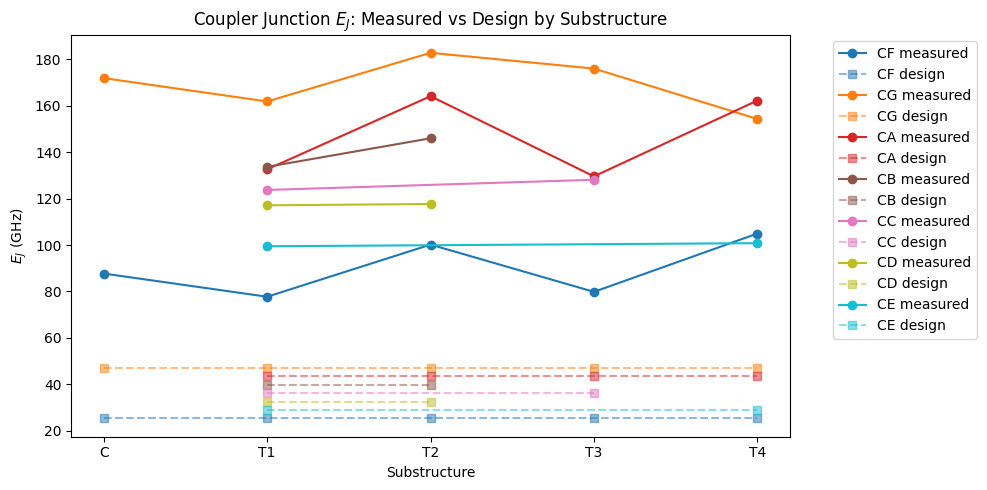

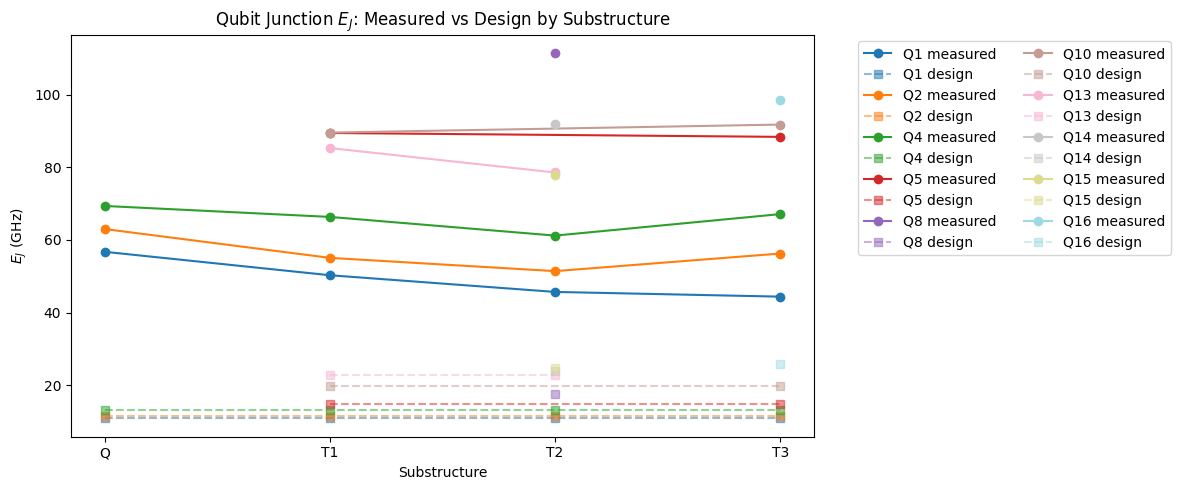

In [180]:
import numpy as np
from matplotlib import colormaps

# Coupler chips: plot measured and design E_J vs substructure, color by chip
plt.figure(figsize=(10, 5))
coupler_chips = coupler_df["Chip"].unique()

# For matplotlib >= 3.5, use colormaps['name'](i/total)
def get_color_map(name, n):
    cmap = colormaps[name]
    return [cmap(i / max(n - 1, 1)) for i in range(n)]

coupler_colors = get_color_map('tab10', len(coupler_chips))



for i, chip in enumerate(coupler_chips):
    group = coupler_df[coupler_df["Chip"] == chip]
    x = group["Substructure"]
    idx = group.index.tolist()
    plt.plot(x, E_Js_coupler_measured[idx], marker='o', linestyle='-', color=coupler_colors[i], label=f"{chip} measured")
    # All substructures in a chip have same design E_J (by design)
    chip_idx = coupler_design_data["Chip"].index(chip)
    design_Ej = E_Js_coupler[chip_idx]
    plt.plot(x, [design_Ej]*len(x), marker='s', linestyle='--', color=coupler_colors[i], alpha=0.5, label=f"{chip} design")

plt.xlabel("Substructure")
plt.ylabel("$E_J$ (GHz)")
plt.title("Coupler Junction $E_J$: Measured vs Design by Substructure")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Qubit chips: plot measured and design E_J vs substructure, color by chip
plt.figure(figsize=(12, 5))
qubit_chips = qubit_df["Chip"].unique()
qubit_colors = get_color_map('tab20', len(qubit_chips))

for i, chip in enumerate(qubit_chips):
    group = qubit_df[qubit_df["Chip"] == chip]
    x = group["Substructure"]
    idx = group.index.tolist()
    plt.plot(x, E_Js_qubit_measured[idx], marker='o', linestyle='-', color=qubit_colors[i], label=f"{chip} measured")
    # All substructures in a chip have same design E_J (by design)
    chip_idx = qubit_design_data["Chip"].index(chip)
    design_Ej = E_Js_qubit[chip_idx]
    plt.plot(x, [design_Ej]*len(x), marker='s', linestyle='--', color=qubit_colors[i], alpha=0.5, label=f"{chip} design")

plt.xlabel("Substructure")
plt.ylabel("$E_J$ (GHz)")
plt.title("Qubit Junction $E_J$: Measured vs Design by Substructure")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


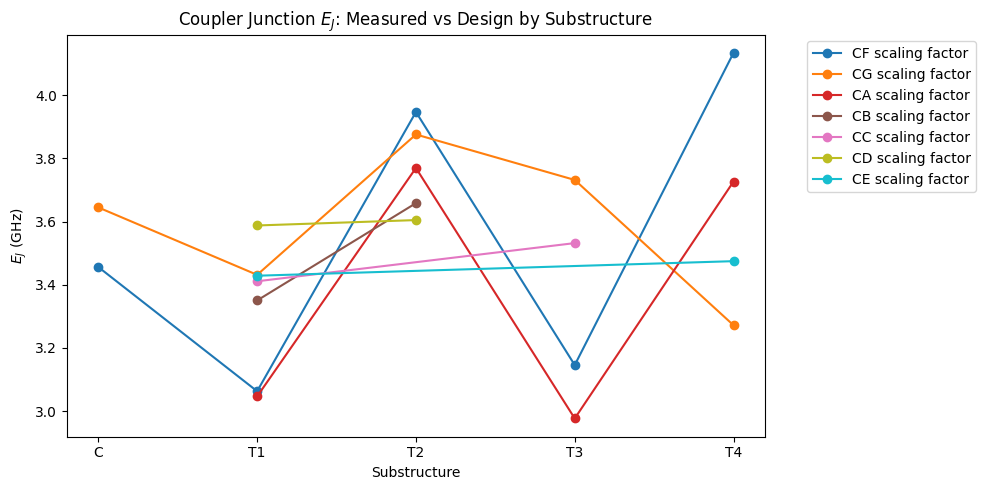

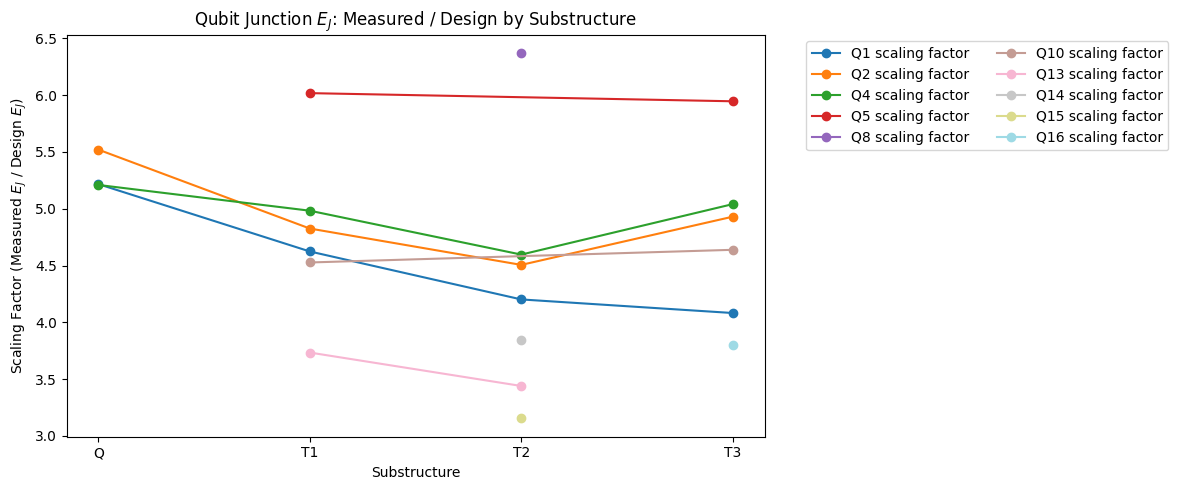

In [183]:
# Coupler chips: plot measured and design E_J vs substructure, color by chip
plt.figure(figsize=(10, 5))
coupler_chips = coupler_df["Chip"].unique()

# For matplotlib >= 3.5, use colormaps['name'](i/total)
def get_color_map(name, n):
    cmap = colormaps[name]
    return [cmap(i / max(n - 1, 1)) for i in range(n)]

coupler_colors = get_color_map('tab10', len(coupler_chips))



for i, chip in enumerate(coupler_chips):
    group = coupler_df[coupler_df["Chip"] == chip]
    x = group["Substructure"]
    idx = group.index.tolist()
    # plt.plot(x, E_Js_coupler_measured[idx], marker='o', linestyle='-', color=coupler_colors[i], label=f"{chip} measured")
    # All substructures in a chip have same design E_J (by design)
    chip_idx = coupler_design_data["Chip"].index(chip)
    design_Ej = E_Js_coupler[chip_idx]
    # plt.plot(x, [design_Ej]*len(x), marker='s', linestyle='--', color=coupler_colors[i], alpha=0.5, label=f"{chip} design")
    scaling_factor_ej = E_Js_coupler_measured[idx] / design_Ej
    plt.plot(x, scaling_factor_ej, marker='o', linestyle='-', color=coupler_colors[i], label=f"{chip} scaling factor")

plt.xlabel("Substructure")
plt.ylabel("$E_J$ (GHz)")
plt.title("Coupler Junction $E_J$: Measured vs Design by Substructure")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Qubit chips: plot measured and design E_J vs substructure, color by chip
plt.figure(figsize=(12, 5))
qubit_chips = qubit_df["Chip"].unique()
qubit_colors = get_color_map('tab20', len(qubit_chips))

for i, chip in enumerate(qubit_chips):
    group = qubit_df[qubit_df["Chip"] == chip]
    x = group["Substructure"]
    idx = group.index.tolist()
    # plt.plot(x, E_Js_qubit_measured[idx], marker='o', linestyle='-', color=qubit_colors[i], label=f"{chip} measured")
    # All substructures in a chip have same design E_J (by design)
    chip_idx = qubit_design_data["Chip"].index(chip)
    design_Ej = E_Js_qubit[chip_idx]
    # plt.plot(x, [design_Ej]*len(x), marker='s', linestyle='--', color=qubit_colors[i], alpha=0.5, label=f"{chip} design")
    scaling_factor_ej = E_Js_qubit_measured[idx] / design_Ej
    plt.plot(x, scaling_factor_ej, marker='o', linestyle='-', color=qubit_colors[i], label=f"{chip} scaling factor")

plt.xlabel("Substructure")
plt.ylabel("Scaling Factor (Measured $E_J$ / Design $E_J$)")
plt.title("Qubit Junction $E_J$: Measured / Design by Substructure")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

### extracted Jc vs pin width 



<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_80754/791728713.py:42: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Design Area ($\mu m^2$)")
/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_80754/791728713.py:57: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Design Area ($\mu m^2$)")


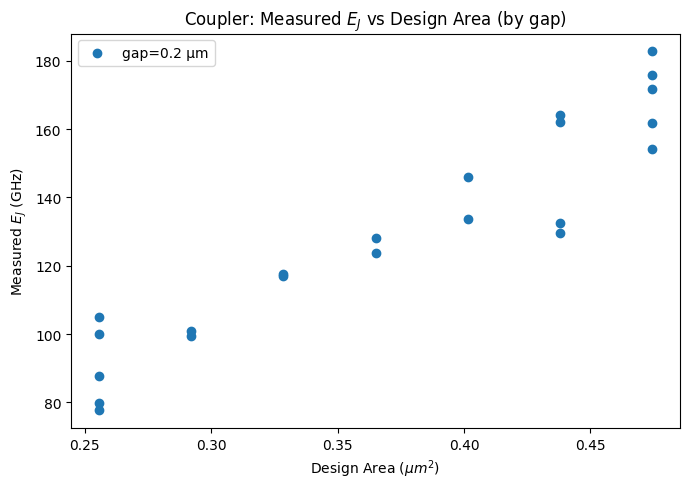

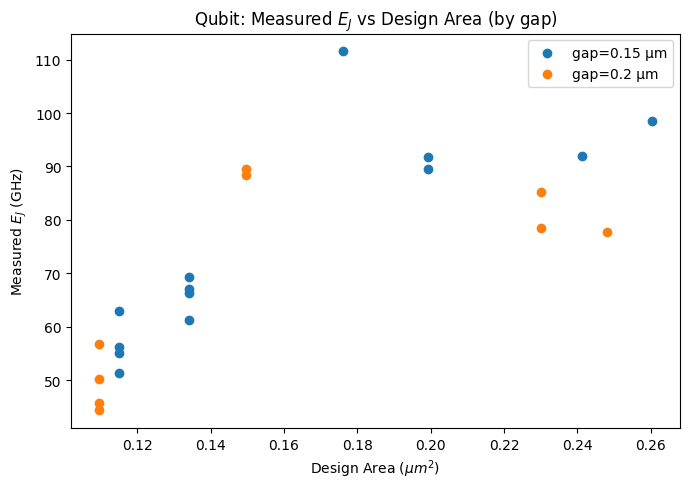

In [188]:
# you have the measured Ejs. Using qubit_design_data and coupler_design_data, you can find the areas, 
# note that design data doesnt have substructure information. so you can assume all substructures in a chip have same design parameters 
# plot ej vs area (use sem length for area calculation)
# can you also segregate data by gap 
import matplotlib.pyplot as plt

# Helper: get design area for each chip in coupler/qubit_df (all substructures in a chip have same design area)
def get_design_areas(df, design_data):
    chip_to_area = {}
    for chip, pin_width, gap in zip(design_data["Chip"], design_data["pin_widths_um"], design_data["gap_um"]):
        # Use SEM length for area calculation
        area = find_junction_area(bridge_width=gap, pin_width=pin_width, use_sem_length=True)
        chip_to_area[chip] = area
    # Map each row in df to its chip's design area
    return [chip_to_area[chip] for chip in df["Chip"]]

# Get design areas for coupler and qubit
coupler_areas_design = get_design_areas(coupler_df, coupler_design_data)
qubit_areas_design = get_design_areas(qubit_df, qubit_design_data)

# Segregate by gap for plotting
def segregate_by_gap(df, design_data, areas_design, E_Js_measured):
    gap_vals = sorted(set(design_data["gap_um"]))
    gap_to_indices = {gap: [] for gap in gap_vals}
    chip_to_gap = {chip: gap for chip, gap in zip(design_data["Chip"], design_data["gap_um"])}
    for i, chip in enumerate(df["Chip"]):
        gap = chip_to_gap[chip]
        gap_to_indices[gap].append(i)
    return gap_to_indices

coupler_gap_indices = segregate_by_gap(coupler_df, coupler_design_data, coupler_areas_design, E_Js_coupler_measured)
qubit_gap_indices = segregate_by_gap(qubit_df, qubit_design_data, qubit_areas_design, E_Js_qubit_measured)

# Plot: Coupler
plt.figure(figsize=(7, 5))
for gap, indices in coupler_gap_indices.items():
    plt.scatter(
        [coupler_areas_design[i] for i in indices],
        [E_Js_coupler_measured[i] for i in indices],
        label=f"gap={gap} μm"
    )
plt.xlabel("Design Area ($\mu m^2$)")
plt.ylabel("Measured $E_J$ (GHz)")
plt.title("Coupler: Measured $E_J$ vs Design Area (by gap)")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Qubit
plt.figure(figsize=(7, 5))
for gap, indices in qubit_gap_indices.items():
    plt.scatter(
        [qubit_areas_design[i] for i in indices],
        [E_Js_qubit_measured[i] for i in indices],
        label=f"gap={gap} μm"
    )
plt.xlabel("Design Area ($\mu m^2$)")
plt.ylabel("Measured $E_J$ (GHz)")
plt.title("Qubit: Measured $E_J$ vs Design Area (by gap)")
plt.legend()
plt.tight_layout()
plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/qv/2zlrl3v97s9_ht7wrdl_fgp00000gn/T/ipykernel_80754/1358423822.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Design Area ($\mu m^2$)")


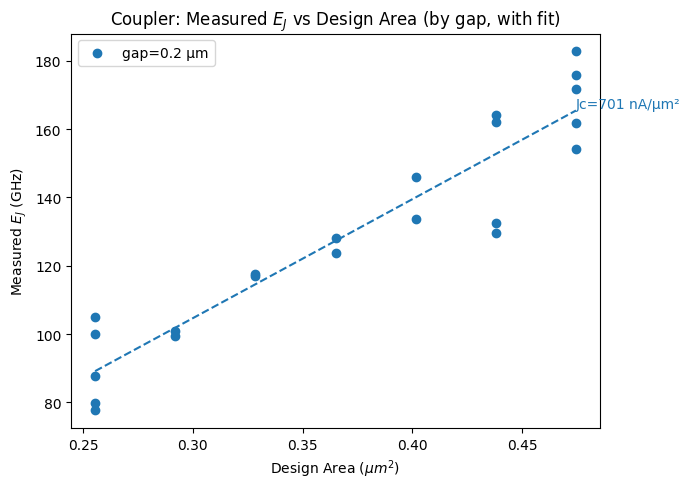

Extracted Jc for Coupler (nA/um^2) by gap: {0.2: 700.9828751668533}


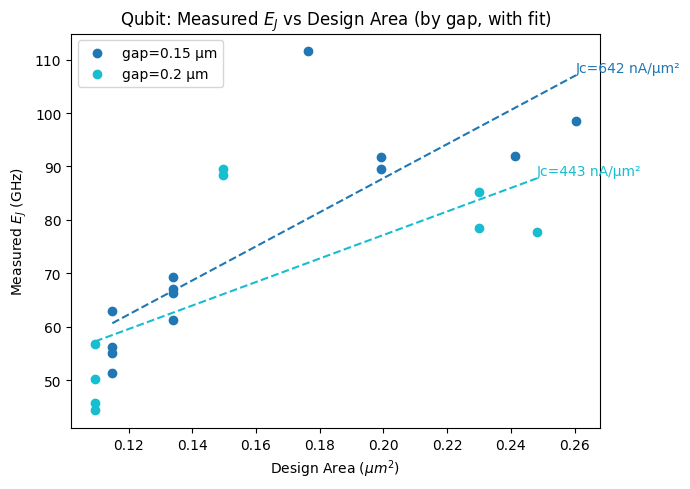

Extracted Jc for Qubit (nA/um^2) by gap: {0.15: 641.940424638514, 0.2: 443.01459110582937}


9

In [ ]:
from scipy.stats import linregress

# you have the measured Ejs. Using qubit_design_data and coupler_design_data, you can find the areas, 
# note that design data doesnt have substructure information. so you can assume all substructures in a chip have same design parameters 
# plot ej vs area (use sem length for area calculation)
# can you also segregate data by gap 
# now for each line, can you do linear fit and the slope should help you find critical current density 
# For each gap, do a linear fit of E_J vs area and extract Jc from the slope
def fit_ej_vs_area_and_extract_jc(areas, ejs, gap_indices, label, color_map):
    jc_results = {}
    plt.figure(figsize=(7, 5))
    for i, (gap, indices) in enumerate(gap_indices.items()):
        x = [areas[j] for j in indices]
        y = [ejs[j] for j in indices]
        plt.scatter(x, y, label=f"gap={gap} μm", color=color_map[i])
        if len(x) > 1:
            slope, intercept, r, p, std_err = linregress(x, y)
            x_fit = np.linspace(min(x), max(x), 100)
            plt.plot(x_fit, slope * x_fit + intercept, '--', color=color_map[i])
            # E_J = (ħ/2e) * Jc * Area / h / 1e9  => Jc = slope * h * 1e9 * 2e / ħ
            Jc_fit = slope * h * 1e9 * 2 * q_e / hbar  # in A/um^2
            Jc_fit_nA_um2 = Jc_fit * 1e9  # nA/um^2
            jc_results[gap] = Jc_fit_nA_um2
            plt.text(x_fit[-1], slope * x_fit[-1] + intercept, f"Jc={Jc_fit_nA_um2:.0f} nA/μm²", color=color_map[i], va='bottom')
    plt.xlabel("Design Area ($\mu m^2$)")
    plt.ylabel("Measured $E_J$ (GHz)")
    plt.title(f"{label}: Measured $E_J$ vs Design Area (by gap, with fit)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return jc_results

# Color maps for plotting
coupler_gap_colors = get_color_map('tab10', len(coupler_gap_indices))
qubit_gap_colors = get_color_map('tab10', len(qubit_gap_indices))

# Coupler fit
jc_coupler = fit_ej_vs_area_and_extract_jc(
    coupler_areas_design, E_Js_coupler_measured, coupler_gap_indices, "Coupler", coupler_gap_colors
)
print("Extracted Jc for Coupler (nA/um^2) by gap:", jc_coupler)

# Qubit fit
jc_qubit = fit_ej_vs_area_and_extract_jc(
    qubit_areas_design, E_Js_qubit_measured, qubit_gap_indices, "Qubit", qubit_gap_colors
)
print("Extracted Jc for Qubit (nA/um^2) by gap:", jc_qubit)


In [195]:
import pandas as pd

# can you combine all the input data into one big dataframe and export as csv
# Combine all relevant data into a single DataFrame
combined_data = []

# Coupler data
for i, row in coupler_df.iterrows():
    chip = row["Chip"]
    sub = row["Substructure"]
    resistance = row["Resistance (kΩ)"]
    chip_name = f"{chip}-{sub}"
    # Find design area and design E_J for this chip
    try:
        design_idx = coupler_design_data["Chip"].index(chip)
        design_area = areas_coupler[design_idx]
        design_Ej = E_Js_coupler[design_idx]
        pin_width = coupler_design_data["pin_widths_um"][design_idx]
        gap = coupler_design_data["gap_um"][design_idx]
    except Exception:
        design_area = None
        design_Ej = None
        pin_width = None
        gap = None
    measured_Ej = E_Js_coupler_measured[i]
    combined_data.append({
        "Type": "Coupler",
        "Chip": chip,
        "Substructure": sub,
        "Chip-Sub": chip_name,
        "Resistance (kΩ)": resistance,
        "Design Pin Width (um)": pin_width,
        "Design Gap (um)": gap,
        "Design Area (um^2) (using sem overlap)": design_area,
        "Design E_J (GHz)": design_Ej,
        "Measured E_J (GHz)": measured_Ej
    })

# Qubit data
for i, row in qubit_df.iterrows():
    chip = row["Chip"]
    sub = row["Substructure"]
    resistance = row["Resistance (kΩ)"]
    chip_name = f"{chip}-{sub}"
    # Find design area and design E_J for this chip
    try:
        design_idx = qubit_design_data["Chip"].index(chip)
        design_area = areas_qubit[design_idx]
        design_Ej = E_Js_qubit[design_idx]
        pin_width = qubit_design_data["pin_widths_um"][design_idx]
        gap = qubit_design_data["gap_um"][design_idx]
    except Exception:
        design_area = None
        design_Ej = None
        pin_width = None
        gap = None
    measured_Ej = E_Js_qubit_measured[i]
    combined_data.append({
        "Type": "Qubit",
        "Chip": chip,
        "Substructure": sub,
        "Chip-Sub": chip_name,
        "Resistance (kΩ)": resistance,
        "Design Pin Width (um)": pin_width,
        "Design Gap (um)": gap,
        "Design Area (um^2) (using sem overlap)": design_area,
        "Design E_J (GHz)": design_Ej,
        "Measured E_J (GHz)": measured_Ej
    })

# Create DataFrame and export as CSV
combined_df = pd.DataFrame(combined_data)
combined_df.to_csv("junctions_combined_data.csv", index=False)
combined_df.head()

,Type,Chip,Substructure,Chip-Sub,Resistance (kΩ),Design Pin Width (um),Design Gap (um),Design Area (um^2) (using sem overlap),Design E_J (GHz),Measured E_J (GHz)
0,Coupler,CF,C,CF-C,0.75600,0.7,0.2,0.2555,25.380527,87.719622
1,Coupler,CF,T1,CF-T1,0.85300,0.7,0.2,0.2555,25.380527,77.744471
2,Coupler,CF,T2,CF-T2,0.66200,0.7,0.2,0.2555,25.380527,100.175278
3,Coupler,CF,T3,CF-T3,0.83055,0.7,0.2,0.2555,25.380527,79.845926
4,Coupler,CF,T4,CF-T4,0.63200,0.7,0.2,0.2555,25.380527,104.930433


In [193]:
combined_df

,Type,Chip,Substructure,Chip-Sub,Resistance (kΩ),Design Pin Width (um),Design Gap (um),Design Area (um^2),Design E_J (GHz),Measured E_J (GHz)
0,Coupler,CF,C,CF-C,0.75600,0.70,0.20,0.25550,25.380527,87.719622
1,Coupler,CF,T1,CF-T1,0.85300,0.70,0.20,0.25550,25.380527,77.744471
2,Coupler,CF,T2,CF-T2,0.66200,0.70,0.20,0.25550,25.380527,100.175278
3,Coupler,CF,T3,CF-T3,0.83055,0.70,0.20,0.25550,25.380527,79.845926
4,Coupler,CF,T4,CF-T4,0.63200,0.70,0.20,0.25550,25.380527,104.930433
5,Coupler,CG,C,CG-C,0.38600,1.30,0.20,0.47450,47.135265,171.803197
6,Coupler,CG,T1,CG-T1,0.41000,1.30,0.20,0.47450,47.135265,161.746424
7,Coupler,CG,T2,CG-T2,0.36300,1.30,0.20,0.47450,47.135265,182.688799
8,Coupler,CG,T3,CG-T3,0.37700,1.30,0.20,0.47450,47.135265,175.904599
9,Coupler,CG,T4,CG-T4,0.43000,1.30,0.20,0.47450,47.135265,154.223335


In [ ]:
from scipy.stats import linregress

# for measured Ejs can you plot Ej by area. 
# Perform a linear fit to extract effective Jc from the fit.
import matplotlib.pyplot as plt

# Qubit: plot measured E_J vs measured area
areas_qubit_measured = [
    w * l for w, l in zip(qubit_data_areas["pin_widths_um"], qubit_data_areas["overlap_um"])
]
E_Js_qubit_measured_subset = [
    E_Js_qubit_measured[q1_q_index], E_Js_qubit_measured[q2_q_index]
]

plt.figure(figsize=(6, 4))
plt.scatter(areas_qubit_measured, E_Js_qubit_measured_subset, color='tab:blue', label='Qubit Data')
slope, intercept, r_value, p_value, std_err = linregress(areas_qubit_measured, E_Js_qubit_measured_subset)
x_fit = np.linspace(min(areas_qubit_measured), max(areas_qubit_measured), 100)
plt.plot(x_fit, slope * x_fit + intercept, 'r--', label=f'Fit: $E_J = {slope:.1f} \\, A + {intercept:.1f}$')

plt.xlabel("Measured Area ($\mu m^2$)")
plt.ylabel("Measured $E_J$ (GHz)")
plt.title("Measured $E_J$ vs Area (Qubits)")
plt.legend()
plt.tight_layout()
plt.show()

# Extract effective Jc from fit: E_J = (ħ/2e) * Jc * Area / h / 1e9
# => Jc = slope * h * 1e9 * 2e / ħ
Jc_fit = slope * h * 1e9 * 2 * q_e / hbar  # in A/m^2
Jc_fit_nA_um2 = Jc_fit * 1e9  # nA/um^2
print(f"Effective Jc from fit: {Jc_fit_nA_um2:.2f} nA/um^2")

# Measured Area

In [128]:
coupler_data_areas = {
    "Chip_names": ["CG"],
    "pin_widths_um": [1.488],
    "junction_length_um": [0.354],
    "gap_um": [0.156]}
print("Coupler Data Areas:")
for name, width, length in zip(coupler_data_areas["Chip_names"], coupler_data_areas["pin_widths_um"], coupler_data_areas["junction_length_um"]):
    area = width * length
    print(f"{name}: pin width = {width:.3f} um, junction length = {length:.3f} um, area = {area:.3f} um^2")
    # designed  pin width , gap and area
    width_designed = coupler_design_data["pin_widths_um"][5]
    gap_designed = coupler_design_data["gap_um"][5]
    length_designed = 0.25#compute_junction_length(bridge_width=gap_designed)
    area_designed = width_designed*0.25#find_junction_area(bridge_width=gap_designed, pin_width=width_designed)
    
    
    print(f"Designed pin width: {width_designed} um, gap: {gap_designed} um, area: {area_designed} um^2")
    # scaling factor  from designed to actual
    print ('****************************')
    scaling_factor_pin_width = width / width_designed
    scaling_factor_overlap = length / length_designed
    scaling_factor_area = area / area_designed
    print(f"Scaling factors  from designed - pin width: {scaling_factor_pin_width:.3f}, overlap: {scaling_factor_overlap:.3f}, area: {scaling_factor_area:.3f}")

Coupler Data Areas:
CG: pin width = 1.488 um, junction length = 0.354 um, area = 0.527 um^2
Designed pin width: 1.3 um, gap: 0.2 um, area: 0.325 um^2
****************************
Scaling factors  from designed - pin width: 1.145, overlap: 1.416, area: 1.621


In [129]:
qubit_data_areas = {
    "Chip": ["Q1-Q", "Q2-Q"],
    "pin_widths_um": [0.456, (0.428 + 0.414)/2],
    "overlap_um": [0.376, (0.366 + 0.399)/2],
    "gap_um": [0.136, (0.109 + 0.113)/2],}
print("Qubit Data Areas:")
for name, width, overlap in zip(qubit_data_areas["Chip"], qubit_data_areas["pin_widths_um"], qubit_data_areas["overlap_um"]):
    area = width * overlap
    print(f"{name}: pin width = {width:.3f} um, overlap = {overlap:.3f} um, area = {area:.3f} um^2")
    # designed  pin width , overlap and area
    index = qubit_design_data["Chip"].index(name)
    width_designed = qubit_design_data["pin_widths_um"][index]
    gap_designed = qubit_design_data["gap_um"][index]
    length_designed = 0.250#compute_junction_length(bridge_width=gap_designed)
    area_designed = width_designed*0.25#find_junction_area(bridge_width=gap_designed, pin_width=width_designed)


    print(f"Designed pin width: {width_designed} um, gap: {gap_designed} um, area: {area_designed} um^2")
    # scaling factor  from designed to actual
    print ('****************************')
    scaling_factor_pin_width = width / width_designed
    scaling_factor_overlap = overlap / length_designed
    scaling_factor_area = area / area_designed
    print(f"Scaling factors  from designed - pin width: {scaling_factor_pin_width:.3f}, overlap: {scaling_factor_overlap:.3f}, area: {scaling_factor_area:.3f}")
    print ('----------------------------------')

Qubit Data Areas:
Q1-Q: pin width = 0.456 um, overlap = 0.376 um, area = 0.171 um^2
Designed pin width: 0.3 um, gap: 0.2 um, area: 0.075 um^2
****************************
Scaling factors  from designed - pin width: 1.520, overlap: 1.504, area: 2.286
----------------------------------
Q2-Q: pin width = 0.421 um, overlap = 0.383 um, area = 0.161 um^2
Designed pin width: 0.3 um, gap: 0.15 um, area: 0.075 um^2
****************************
Scaling factors  from designed - pin width: 1.403, overlap: 1.530, area: 2.147
----------------------------------


In [91]:
# estimate Jc or Ic per unit area for Q1 using measured area and measured Ej 
# Estimate Jc (critical current density) or Ic per unit area for Q1 using measured area and measured E_J

# Use measured E_J for Q1 (from E_Js_qubit_measured) and measured area (from qubit_data_areas)
# E_J = (ħ / 2e) * I_c  =>  I_c = (2e / ħ) * E_J
# J_c = I_c / area

# Get measured E_J for Q1 (in GHz)
# index of Q1-Q in ej array
# Find the index of "Q1-Q" in qubit_chip_names and use it to get measured E_J
q1_q_index = list(qubit_chip_names).index("Q1-Q")

E_J_GHz_Q1 = E_Js_qubit_measured[q1_q_index]  # in GHz
area_meas = qubit_data_areas["pin_widths_um"][0] * qubit_data_areas["overlap_um"][0]  # in um^2
Jc = critical_current_density_from_E_J(E_J_GHz_Q1, area_meas)  # in nA/um^2

print(f"Q1 measured E_J: {E_J_GHz_Q1:.2f} GHz")
print(f"Q1 measured area: {area_meas:.3f} um^2")
print(f"Estimated Jc for Q1: {Jc:.2f} nA/um^2")

Q1 measured E_J: 56.75 GHz
Q1 measured area: 0.146 um^2
Estimated Jc for Q1: 783.48 nA/um^2


In [92]:
q2_q_index = list(qubit_chip_names).index("Q2-Q")

E_J_GHz_Q2 = E_Js_qubit_measured[q2_q_index]  # in GHz
area_meas_q2 = qubit_data_areas["pin_widths_um"][1] * qubit_data_areas["overlap_um"][1]  # in um^2
Jc_q2 = critical_current_density_from_E_J(E_J_GHz_Q2, area_meas_q2)  # in nA/um^2

print(f"Q2 measured E_J: {E_J_GHz_Q2:.2f} GHz")
print(f"Q2 measured area: {area_meas_q2:.3f} um^2")
print(f"Estimated Jc for Q2: {Jc_q2:.2f} nA/um^2")
# scaling factors  from designed to actual for jc
print(f"Estimated Jc scaling factors from designed to actual - Q1: {Jc/critical_current_per_area:.3f}, Q2: {Jc_q2/critical_current_per_area:.3f}")

Q2 measured E_J: 63.01 GHz
Q2 measured area: 0.154 um^2
Estimated Jc for Q2: 825.40 nA/um^2
Estimated Jc scaling factors from designed to actual - Q1: 3.917, Q2: 4.127


In [93]:
# Find index of "CG-C" in coupler_chip_names and get measured E_J
cg_c_index = list(coupler_chip_names).index("CG-C")
E_J_GHz_CG = E_Js_coupler_measured[cg_c_index]
area_meas_cg = coupler_data_areas["pin_widths_um"][0] * coupler_data_areas["junction_length_um"][0]  # in um^2
Jc_cg = critical_current_density_from_E_J(E_J_GHz_CG, area_meas_cg)  # in nA/um^2

print(f"CG-C measured E_J: {E_J_GHz_CG:.2f} GHz")
print(f"CG-C measured area: {area_meas_cg:.3f} um^2")
# print(f"Estimated Jc for CG-C: {Jc_cg:.2f} nA/um^2")
#print scaling fractor for Jc 
print(f"Estimated Jc for CG-C: {Jc_cg:.2f} nA/um^2, Scaling factor from design Jc: {Jc_cg/critical_current_per_area:.3f}")

CG-C measured E_J: 171.80 GHz
CG-C measured area: 0.541 um^2
Estimated Jc for CG-C: 639.80 nA/um^2, Scaling factor from design Jc: 3.199


# DUMP

qubit_data_areas = {
    "Chip": ["Q1", "Q2"],
    "pin_widths_um": [217/100*0.2, (((164/80*0.2)+(45/130*1)))/2],
    "gap_um": [(150+186)/100*0.2/2, ((168/80*0.2)+(53/130*1))/2],}
print("Qubit Data Areas:")
for name, width, gap in zip(qubit_data_areas["Chip"], qubit_data_areas["pin_widths_um"], qubit_data_areas["gap_um"]):
    area = width * gap
    print(f"{name}: pin width = {width:.3f} um, gap = {gap:.3f} um, area = {area:.3f} um^2")

In [72]:
critical_current_per_area = 0.2 # micro A /um^2
junction_length = 0.25 # currently we are getting 0.25 um 


In [73]:
# m,akeimport numpy as np

In [ ]:
import numpy as np
# given the calculations below, compute the bridge width given angle, undercut length and junction length
def compute_pin_width(junction_length, undercut_length, angle_deg):
    """
    Compute the bridge width given junction length, undercut length, and angle.
    Returns the bridge width in um.
    """
    dep_width = undercut_length * np.tan(np.radians(angle_deg))
    pin_width = 2 * dep_width - junction_length
    return pin_width

pin_width = compute_pin_width(junction_length = junction_length, undercut_length= 0.800, angle_deg = 15.7)
print(f"Bridge width: {pin_width:.2f} um")
gap = junction_length


Bridge width: 0.20 um


# What is the \(E_J\) I need?

In [75]:
# given E_c  and omeaga find E_J
Ec = 0.06 # GHz
target_omega = 4.8# GHz
is_squid = True
def find_E_J(E_c, omega):
    """
    Find E_J given E_c and omega.
    """
    return ((omega-E_c)**2) / (8 * E_c)

targ_Ej = find_E_J(Ec, target_omega)
if is_squid:
    # for squid we need to divide by 2
    targ_Ej /= 2
print(f"targ_Ej = {targ_Ej:.2f} GHz")

targ_Ej = 23.40 GHz


In [76]:

def find_L_J(E_J_freq):
    """
    Calculate Josephson inductance L_J from Josephson energy frequency E_J_freq (in GHz).

    L_J = Φ₀² / (4 * π² * h * E_J_freq)
    where:
        Φ₀ = flux quantum = 2.068e-15 Wb
        h = Planck's constant = 2π * ħ
    """
    phi0 = 2.068e-15  # Wb
    h = 6.62607015e-34  # J*s
    E_J_Hz = E_J_freq * 1e9  # Convert GHz to Hz
    L_J = phi0**2 / (4 * np.pi**2 * h * E_J_Hz)
    return L_J

L_J = find_L_J(targ_Ej)
print(f"L_J = {L_J * 1e9:.2e} nH")
    

L_J = 6.99e+00 nH


In [77]:
# convert C into E_C
def capacitance_from_Ec(Ec):
    """
    Convert charging energy E_c (in GHz) to capacitance C (in Farads).
    E_c = e^2 / (2C * hbar)
    """
    e = 1.602176634e-19  # C
    hbar = 1.0545718e-34  # J*s
    Ec_J = Ec * 1e9 * hbar  # Convert GHz to Joules
    C = e**2 / (2 * Ec_J)
    return C

C = capacitance_from_Ec(Ec = 0.143)
print(f"Capacitance C = {C*1e15:.2f} fF")

Capacitance C = 851.10 fF


In [78]:
1/np.sqrt(L_J*C) * 1e-9 # convert to GHz

12.969127909106332

# What is the pin size I need ? 
given a gap of 0.25 microns

In [79]:
import numpy as np

# Use this $$E_J = \frac{\hbar}{2e}{I_c}$$  and critical current per area to find the pin size using a function
def pin_size_from_Ej(E_j, critical_current_per_area, gap):
    """
    Calculate the pin size (area) needed for a given E_j.
    E_j: Josephson energy in GHz
    critical_current_per_area: in microA/um^2
    gap: in um (not used in calculation, just for reference)
    Returns: area in um^2
    """
    # Constants
    hbar = 1.0545718e-34  # J*s
    e = 1.602176634e-19   # C
    GHz_to_J = 6.62607015e-34  # Planck's constant (J*s) * 1 Hz

    # Convert E_j from GHz to Joules
    E_j_J = E_j * GHz_to_J * 1e9

    # Calculate I_c from E_j
    I_c = (2 * e * E_j_J) / hbar  # in Amps

    # Convert critical_current_per_area to A/um^2
    critical_current_per_area_A = critical_current_per_area * 1e-6

    # Area in um^2
    area = I_c / critical_current_per_area_A
    print(area)
    return area/gap

pin_length = pin_size_from_Ej(targ_Ej, critical_current_per_area, gap)
print(f"Required pin length: {pin_length:.2f} um")

0.23560023519824635
Required pin length: 0.94 um


# What RT resistance will I measure?

In [80]:
# Use these formilas to find resistance of junction $$E_J = \frac{\hbar}{2e}{I_c}$$
# where critical current goes linearly with area and inversely prp to oxide thickness

# $$I_C = \frac{\pi \Delta(0)}{2eR_n}$$
# where \(\Delta(0) = 170 \mu\text{eV}\) for Aluminum 
def calculate_R_n(pin_length, gap, critical_current_per_area):
    """
    Calculate the normal resistance R_n of the junction.

    Formulas used:
    - Area = pin_length × gap
    - Critical current: I_c = critical_current_per_area × Area
    - Josephson relation: E_J = (ħ / 2e) * I_c
    - I_C = (π Δ(0)) / (2e R_n), where Δ(0) = 170 μeV for Aluminum

    Args:
        pin_length: length of the pin in um
        gap: gap in um
        critical_current_per_area: in microA/um^2

    Returns:
        R_n in Ohms
    """
    # Constants
    e = 1.602176634e-19  # C
    Delta_0 = 170e-6 * e  # 170 μeV in Joules

    # Calculate area
    area = pin_length * gap  # um^2

    # Calculate critical current (I_c)
    critical_current_per_area_A = critical_current_per_area * 1e-6  # A/um^2
    I_c = critical_current_per_area_A * area  # A

    # Calculate R_n using I_C = (π Δ(0)) / (2e R_n)
    R_n = (np.pi * Delta_0) / (2 * e * I_c)  # Ohms

    return R_n


R_n = calculate_R_n(pin_length, gap, critical_current_per_area)
print(f"Expected RT resistance R_n: {R_n:.2f} Ω")

Expected RT resistance R_n: 5667.13 Ω


# Summarize the results of whole notebook in a few lines with a list of ciritcial parameters

In [ ]:
print("Summary of Critical Parameters:")
print(f"- Target Frequency (ω): {target_omega} GHz")
print(f"- Charging Energy (E_c): {Ec:.3f} GHz")
print(f"- Target Josephson Energy (E_J): {targ_Ej:.2f} GHz")
print(f"- Critical Current per Area: {critical_current_per_area} μA/μm²")
print(f"- Gap: {gap} μm")
print(f"- Required Pin Length: {pin_length:.2f} μm")
print(f"- Expected RT Resistance (R_n): {R_n:.2f} Ω")
print(f"- Bridge Width: {pin_width:.2f} um")

Summary of Critical Parameters:
- Target Frequency (ω): 4.8 GHz
- Charging Energy (E_c): 0.060 GHz
- Target Josephson Energy (E_J): 23.40 GHz
- Critical Current per Area: 0.2 μA/μm²
- Gap: 0.25 μm
- Required Pin Length: 0.94 μm
- Expected RT Resistance (R_n): 5667.13 Ω
- Bridge Width: 0.20 um
